In [1]:
!pip install gradio

INFO: pip is looking at multiple versions of gradio to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement pydantic<2.12,>=2.0 (from gradio) (from versions: none)
ERROR: No matching distribution found for pydantic<2.12,>=2.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.metrics.pairwise import cosine_similarity


In [4]:
df = pd.read_csv("/kaggle/input/datasets/saugataroyarghya/resume-dataset/resume_data.csv")

df.head()


,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,NaN,NaN,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,[None],[None],"['February 15, 2021']",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,NaN,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000


In [5]:
print(df.columns.tolist())

['address', 'career_objective', 'skills', 'educational_institution_name', 'degree_names', 'passing_years', 'educational_results', 'result_types', 'major_field_of_studies', 'professional_company_names', 'company_urls', 'start_dates', 'end_dates', 'related_skils_in_job', 'positions', 'locations', 'responsibilities', 'extra_curricular_activity_types', 'extra_curricular_organization_names', 'extra_curricular_organization_links', 'role_positions', 'languages', 'proficiency_levels', 'certification_providers', 'certification_skills', 'online_links', 'issue_dates', 'expiry_dates', '\ufeffjob_position_name', 'educationaL_requirements', 'experiencere_requirement', 'age_requirement', 'responsibilities.1', 'skills_required', 'matched_score']


In [6]:
df.columns = df.columns.str.strip()          
df.columns = df.columns.str.replace('\ufeff', '')  


In [9]:
print(df.columns.tolist())

['address', 'career_objective', 'skills', 'educational_institution_name', 'degree_names', 'passing_years', 'educational_results', 'result_types', 'major_field_of_studies', 'professional_company_names', 'company_urls', 'start_dates', 'end_dates', 'related_skils_in_job', 'positions', 'locations', 'responsibilities', 'extra_curricular_activity_types', 'extra_curricular_organization_names', 'extra_curricular_organization_links', 'role_positions', 'languages', 'proficiency_levels', 'certification_providers', 'certification_skills', 'online_links', 'issue_dates', 'expiry_dates', 'job_position_name', 'educationaL_requirements', 'experiencere_requirement', 'age_requirement', 'responsibilities.1', 'skills_required', 'matched_score']


In [10]:
df = df[['career_objective',
         'skills',
         'skills_required',
         'job_position_name',
         'matched_score']]

df = df.dropna()

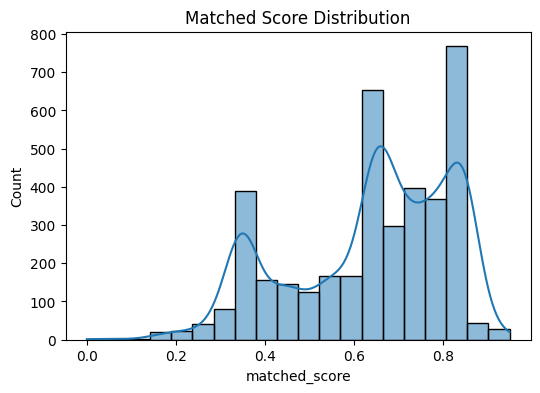

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df["matched_score"], bins=20, kde=True)
plt.title("Matched Score Distribution")
plt.show()


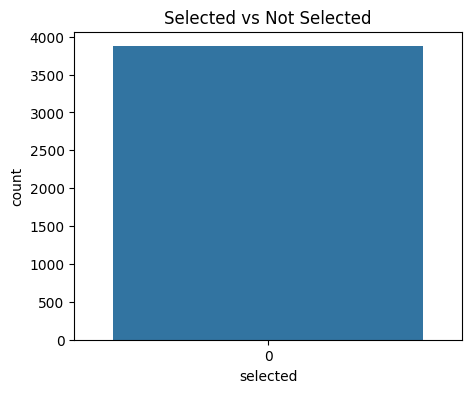

In [12]:
df["selected"] = df["matched_score"].apply(lambda x: 1 if x >= 70 else 0)

plt.figure(figsize=(5,4))
sns.countplot(x="selected", data=df)
plt.title("Selected vs Not Selected")
plt.show()


In [13]:
df["combined_text"] = (
    df["career_objective"].astype(str) + " " +
    df["skills"].astype(str) + " " +
    df["skills_required"].astype(str) + " " +
    df["job_position_name"].astype(str)
)


In [15]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")

X = vectorizer.fit_transform(df["combined_text"])
y = df["job_position_name"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [17]:
print(y.value_counts())


job_position_name
AI Engineer                                                                                169
Project Coordinator (Civil)                                                                169
Site Engineer                                                                              169
Asst. Manager/ Manger (Administrative)                                                     169
Manager- Human Resource Management (HRM)\n                                                 169
Civil Engineer                                                                             169
HR Officer                                                                                 169
Executive/ Senior Executive- Trade Marketing, Hygiene Products                             168
Mechanical Designer                                                                        168
Mechanical Engineer                                                                        168
Senior iOS Engineer             

In [18]:
print(df["matched_score"].describe())


count    3871.000000
mean        0.639273
std         0.178439
min         0.000000
25%         0.516667
50%         0.650000
75%         0.783333
max         0.950000
Name: matched_score, dtype: float64


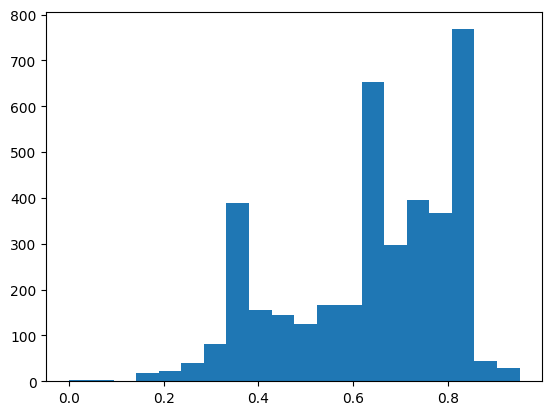

In [19]:
plt.hist(df["matched_score"], bins=20)
plt.show()


In [20]:
threshold = df["matched_score"].median()

df["selected"] = df["matched_score"].apply(
    lambda x: 1 if x >= threshold else 0
)


In [21]:
print(df["selected"].value_counts())


selected
1    2447
0    1424
Name: count, dtype: int64


In [22]:
X = vectorizer.fit_transform(df["combined_text"])
y = df["selected"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [23]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.8206451612903226

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       303
           1       0.85      0.85      0.85       472

    accuracy                           0.82       775
   macro avg       0.81      0.81      0.81       775
weighted avg       0.82      0.82      0.82       775



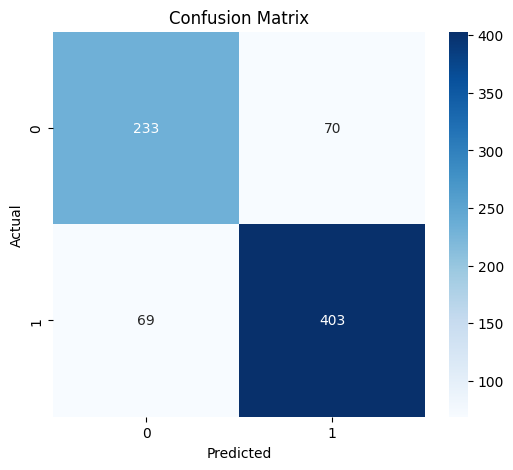

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


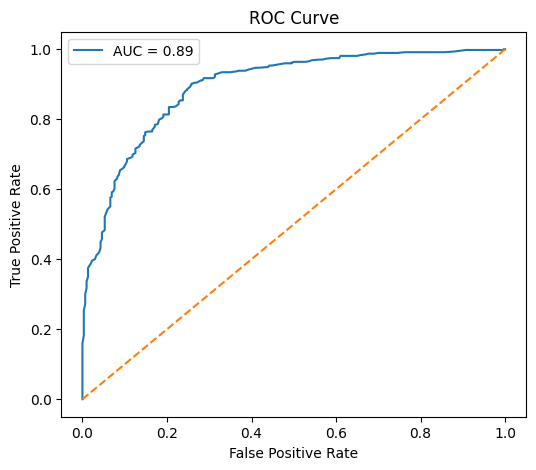

In [25]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [26]:
def similarity_score(resume_text, job_text):
    vectors = vectorizer.transform([resume_text, job_text])
    score = cosine_similarity(vectors[0], vectors[1])
    return round(score[0][0] * 100, 2)


In [27]:
def screen_candidate(career_objective, skills, skills_required, job_position):

    combined = career_objective + " " + skills + " " + skills_required + " " + job_position

    vectorized = vectorizer.transform([combined])

    prediction = model.predict(vectorized)[0]
    probability = model.predict_proba(vectorized)[0][1]

    similarity = similarity_score(
        career_objective + " " + skills,
        skills_required + " " + job_position
    )

    if prediction == 1:
        decision = "Strong Match - High Selection Chance"
    else:
        decision = "Low Match - Improve Skill Alignment"

    return f"""
Prediction: {decision}

Selection Probability: {round(probability*100,2)} %

Resume-Job Similarity: {similarity} %
"""

interface = gr.Interface(
    fn=screen_candidate,
    inputs=[
        gr.Textbox(label="Career Objective"),
        gr.Textbox(label="Skills"),
        gr.Textbox(label="Skills Required"),
        gr.Textbox(label="Job Position")
    ],
    outputs="text",
    title="AI Resume Screening & Interview Evaluation System",
    description="NLP + ML based Resume-Job Matching"
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).


Could not create share link. Missing file: /root/.cache/huggingface/gradio/frpc/frpc_linux_amd64_v0.3. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.3/frpc_linux_amd64
2. Rename the downloaded file to: frpc_linux_amd64_v0.3
3. Move the file to this location: /root/.cache/huggingface/gradio/frpc
